In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import igdbapi

%matplotlib inline

# Game Sucess Analysis

# The goal is to identify which factors, and combinations of factors, make a game successful.

### and if  there is any relationsip between a game high rating and the platform and genre of a game! 

### and if there is any relationship between a game high global sales and the platform and genre of a game! 

#### On the first attempt in order to acquire the largest and most reliable dataset, a test with IGDB (Internet Game Database) was tried. IGDB retrieves data from different sources, it's free and has a high number of daily queries.

#### igdbapi is an implemented crawler for the API, which cointain methods to get the data easily



#### Unfortunetaly, after getting the data, additional scrapping is required from other datasets in the API's to transform the ID's of the columns in the real name (foreign key). Which require a more time consuming solution

#### From that point on the datasets provides from ign as csv files were used for the analysis

In [2]:
# API Crawler from: https://github.com/noragami/igdbapi
# MIT License

#Copyright (c) 2017 Daniele Dell'Erba

In [3]:
# API Key
key = 'feFQMqx7camshC9IwRH4Nifrmd2fp16AmoyjsnkdEa8lPa0ZgF'

In [4]:
# Client initialization
igdbapi.core.APIClient(api_key=key)

In [5]:
# Checking meta
igdbapi.games.Games().meta()

['name',
 'slug',
 'url',
 'created_at',
 'updated_at',
 'summary',
 'storyline',
 'collection',
 'franchise',
 'hypes',
 'rating',
 'popularity',
 'aggregated_rating',
 'aggregated_rating_count',
 'total_rating',
 'total_rating_count',
 'rating_count',
 'game',
 'games',
 'tags',
 'developers',
 'publishers',
 'game_engines',
 'category',
 'time_to_beat',
 'time_to_beat.hastly',
 'time_to_beat.normally',
 'time_to_beat.completely',
 'player_perspectives',
 'game_modes',
 'keywords',
 'themes',
 'genres',
 'first_release_date',
 'status',
 'pulse_count',
 'release_dates',
 'release_dates.category',
 'release_dates.platform',
 'release_dates.date',
 'release_dates.region',
 'release_dates.human',
 'release_dates.y',
 'release_dates.m',
 'alternative_names',
 'alternative_names.name',
 'alternative_names.comment',
 'screenshots',
 'screenshots.url',
 'screenshots.cloudinary_id',
 'screenshots.width',
 'screenshots.height',
 'videos',
 'videos.name',
 'videos.video_id',
 'cover',
 'cover.

In [6]:
# Retrieving the data and creating the lists to generate the dataframe

# TODO: Implement method to generate the lists without redudancy

names=[]; rating=[]; rating_count=[]; popularity=[]; genres=[]; perspectives=[]

for x in range(1,10):
    game = igdbapi.games.Games().find(x)

    try:
        names.append(game.name)
    except AttributeError:
        names.append('nan')
    
    try:
        popularity.append(game.popularity)
    except AttributeError:
        popularity.append('nan')
    
    try:
        genres.append(game.genres)
    except AttributeError:
        genres.append('nan')
    
    try:
        perspectives.append(game.player_perspectives)
    except AttributeError:
        perspectives.append('nan')
    
    try:
        rating_count.append(game.rating_count)
    except AttributeError:
        rating_count.append('nan')
    
    try:
        rating.append(game.rating)
    except AttributeError:
        rating.append('nan')

In [8]:
# Creating the Dataframe

crit_df = pd.DataFrame({
                        'Name':names,
                        'Rating': rating,
                        'Rating_count': rating_count,
                        'Popularity': popularity,
                        'Genres': genres, 
                        'Perspective': perspectives
                        })

In [9]:
# Glimpse on the database
crit_df

,Genres,Name,Perspective,Popularity,Rating,Rating_count
0,[5],Thief II: The Metal Age,[1],2.142857,90.976,38
1,[5],Thief: The Dark Project,[1],1.571429,83.3814,51
2,[5],Thief: Deadly Shadows,"[1, 2]",1.428571,81.2402,35
3,[5],Thief,[1],2.857143,72.2576,67
4,[12],Baldur's Gate,[3],5.000000,90.3825,74
5,"[12, 15]",Baldur's Gate II: Shadows Of Amn,[3],2.142857,90.7379,128
6,"[12, 16, 24]",Jagged Alliance,[3],1.142857,88.6662,6
7,"[12, 16, 24]",Jagged Alliance: Deadly Games,[3],1.142857,nan,nan
8,"[12, 16, 24]",Jagged Alliance 2,[3],1.142857,90.0739,9


In [ ]:
###
# Following another approach
###

# Commercial Perspective Analysis

# Global Analysis

In [10]:
# Importing data

In [11]:
vgs = pd.read_csv("data/ign_data/vgsales.csv", index_col=0)

In [12]:
# First glympse of the dataset
vgs.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
vgs.shape

(16598, 10)

### What's the most profitable Global sales period?

In [14]:
# Lets group the sales over the years and check the total amount of Global Sales
gSalesYear = vgs.groupby(vgs.Year).Global_Sales.sum().reset_index().sort_values('Year', ascending=True)

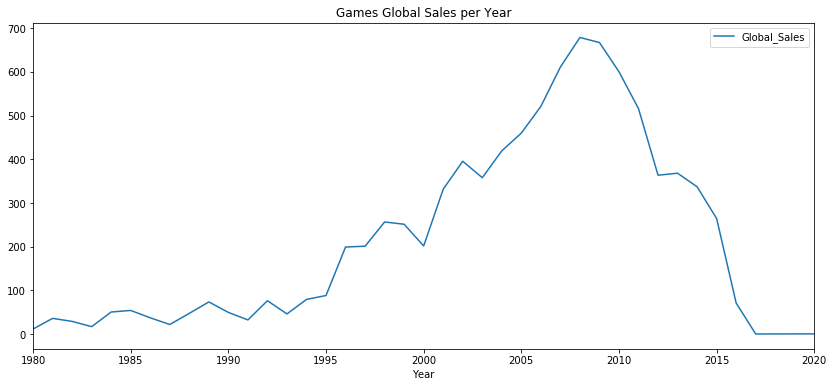

In [15]:
# Ploting the graphic
gSalesYear.plot(x='Year', y='Global_Sales', figsize=(14,6), title='Games Global Sales per Year')

#### Based on the Pareto's Principle (80/20) where 80% of effects come from 20% of causes, let's find if it's apply for global sales along the years. Moreover we want to focus on the years where the current platforms were in the market already.

In [16]:
# Finding the 80% from total global sales
total_80p = gSalesYear.Global_Sales.sum()*.8
total_80p

7056.2879999999632

In [17]:
# Best year for global sales (peak)
gSalesYear.sort_values('Global_Sales', ascending=False).head(1)

,Year,Global_Sales
28,2008.0,678.9


In [18]:
# 20% of the quantity of the years
gSalesYear.Year.count()*.2

7.8000000000000007

In [19]:
# Around 8 years using 2008 as the peak we have the period between 2005 and 2013 
gSalesPeriod = vgs[(vgs.Year>=2005) & (vgs.Year<=2013)]

In [20]:
gSalesPeriod.Global_Sales.sum()/total_80p

0.67831698479427494

#### The 20% of the years actually represent around 67% of the Global sales. 

#### From now on let's use the period between 2005 and 2016 (inclusive) for further analysis. Once the new platforms are more relevant for sales.

In [21]:
gSalesPeriod = vgs[(vgs.Year>=2005) & (vgs.Year<=2016)]

### What's the most profitable platforms on the desired period?

In [22]:
gSalesPlat = gSalesPeriod.groupby(gSalesPeriod.Platform).Global_Sales.sum().reset_index().sort_values('Global_Sales', ascending=False)

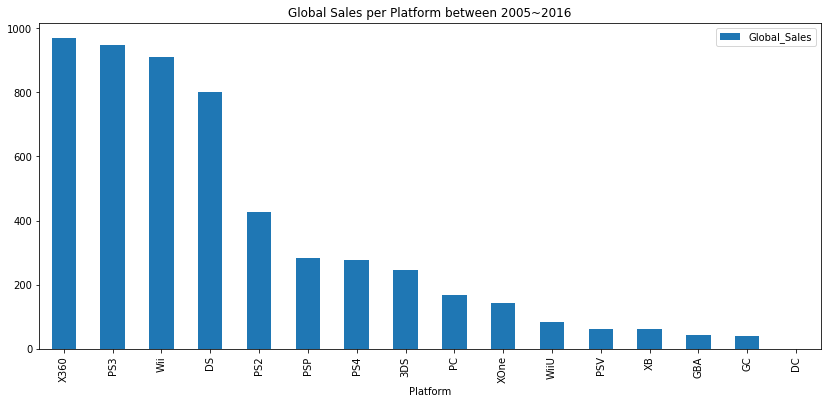

In [23]:
gSalesPlat.plot(x='Platform', y='Global_Sales', kind='bar', figsize=(14,6), title='Global Sales per Platform between 2005~2016')

### What's the most profitable genres in the desirable period?

In [24]:
gSalesGenr = gSalesPeriod.groupby(vgs.Genre).Global_Sales.sum().reset_index().sort_values('Global_Sales', ascending=False)

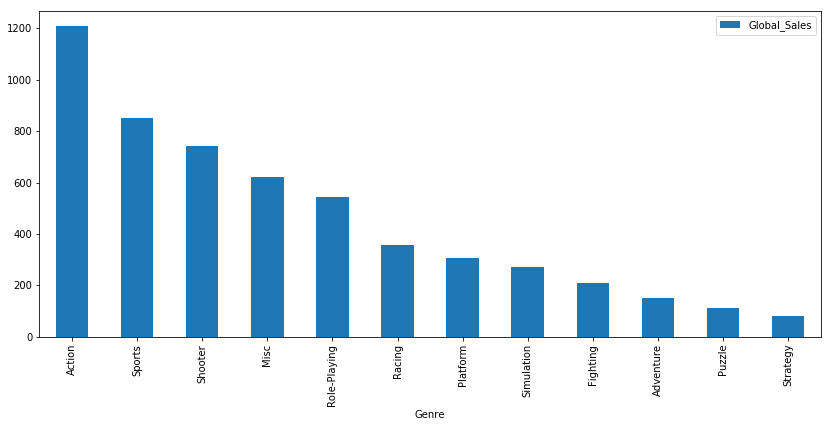

In [25]:
gSalesGenr.plot(x='Genre', y='Global_Sales', kind='bar', figsize=(14,6))

## Conclusions on a Global scale:
#### Action, Sports, Shooter, Misc and Role-Playing are the most impactful genres
#### Xbox360, PS3 , Wii and DS are most impactful platforms


# Regional Analysis

In [26]:
#TODO

# Critically Perspective Analysis

In [27]:
# Importing the data 

ign = pd.read_csv("data/ign_data/ign.csv")

In [28]:
# Checking the dataset
ign.head(5)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [29]:
ign.shape

(18625, 11)

### What'are the most well evaluated genres and platforms?

#### The split values choice for the desired features are scores bigger or equal than 9.0 and amazing score_phase 

In [33]:
test = ign[(ign.score >= 9.0) & (ign.editors_choice == 'N')]

In [34]:
test

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
146,146,Amazing,Super Hexagon,/games/super-hexagon/iphone-143440,iPhone,9.0,Action,N,2012,9,19
375,375,Amazing,Mass Effect 3 (Special Edition),/games/mass-effect-3/wii-u-135743,Wii U,9.5,RPG,N,2012,11,21
500,500,Amazing,NHL FaceOff,/games/nhl-faceoff/ps-555,PlayStation,9.0,Sports,N,1996,11,25
543,543,Amazing,Suikoden,/games/suikoden/ps-443,PlayStation,9.0,RPG,N,1997,1,22
576,576,Amazing,Tomb Raider -- Featuring Lara Croft,/games/tomb-raider-featuring-lara-croft/ps-97,PlayStation,9.3,Adventure,N,1996,12,13
579,579,Amazing,NBA In the Zone 2,/games/nba-in-the-zone-2/ps-331,PlayStation,9.0,Sports,N,1996,12,12
585,585,Amazing,Carnage Heart,/games/carnage-heart/ps-304,PlayStation,9.2,Strategy,N,1997,3,5
619,619,Amazing,Triple Play '98,/games/triple-play-98/ps-1874,PlayStation,9.2,Sports,N,1997,5,13
731,731,Amazing,International Superstar Soccer 64,/games/international-superstar-soccer-64/n64-1996,Nintendo 64,9.0,Sports,N,1997,9,3
777,777,Amazing,Monster Rancher,/games/monster-rancher/ps-2180,PlayStation,9.0,Simulation,N,1997,11,19


In [ ]:
amazingGames_df = ign[(ign.score_phrase == 'Amazing') & (ign.score >= 9.0)]

In [ ]:
# From all those highly rated games, let's find those who the media approves
temp_df = amazingGames_df.groupby(amazingGames_df.platform).editors_choice.count().reset_index().sort_values('editors_choice', ascending=False)

In [ ]:
temp_df.plot(x='platform', y='editors_choice', kind='bar', figsize=(16,6))

In [ ]:
# Let's use the same approach for the genre 
temp_df = amazingGames_df.groupby(amazingGames_df.genre).editors_choice.count().reset_index().sort_values('editors_choice', ascending=False)

In [ ]:
temp_df.plot(x='genre', y='editors_choice', kind='bar', figsize=(16,6))

# Conclusions:
### Action, Shooter, Sports, and RPG are the most well evaluated genres
### PC, Xbox360, Playstation3 and Playstation2 are the platforms with the biggest amount of high evaluated games